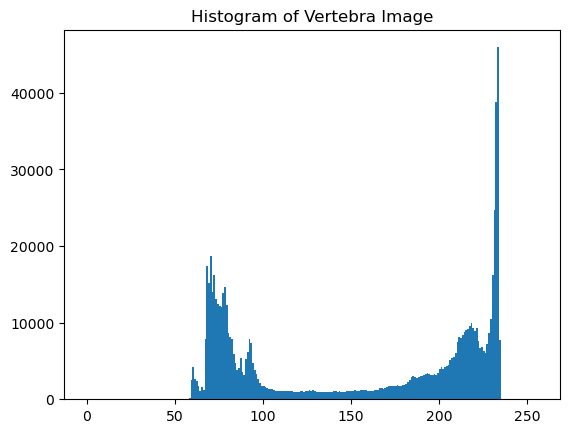

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

# Read the image
image = cv2.imread(r'C:\Users\stani\Desktop\chuj\exercises\ex3-PixelwiseOperations\data\vertebra.png', cv2.IMREAD_GRAYSCALE)

# Show the histogram
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Vertebra Image')
plt.show()


In [3]:
min_val = image.min()
max_val = image.max()

print(f"Min pixel value: {min_val}")
print(f"Max pixel value: {max_val}")


Min pixel value: 57
Max pixel value: 235


In [4]:
from skimage.util import img_as_float

image_float = img_as_float(image)
print(f"Float image min: {image_float.min()}, max: {image_float.max()}")


Float image min: 0.22352941176470587, max: 0.9215686274509803


In [5]:
from skimage.util import img_as_ubyte

image_byte = img_as_ubyte(image_float)
print(f"Unsigned byte image min: {image_byte.min()}, max: {image_byte.max()}")


Unsigned byte image min: 57, max: 235


In [6]:
from skimage.util import img_as_ubyte

def histogram_stretch(img_in):
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    
    img_out = (img_float - min_val) / (max_val - min_val)  # Stretching
    img_out = img_as_ubyte(img_out)  # Convert back to byte

    return img_out


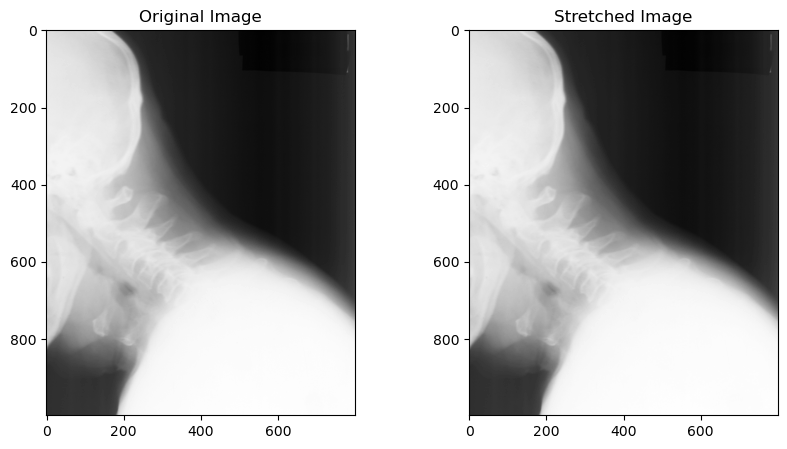

In [7]:
image_stretched = histogram_stretch(image)

# Show the original and stretched image side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Stretched Image')
plt.imshow(image_stretched, cmap='gray')

plt.show()


In [8]:
import numpy as np

def gamma_map(img_in, gamma):
    img_float = img_as_float(img_in)
    img_gamma = np.power(img_float, gamma)
    return img_as_ubyte(img_gamma)


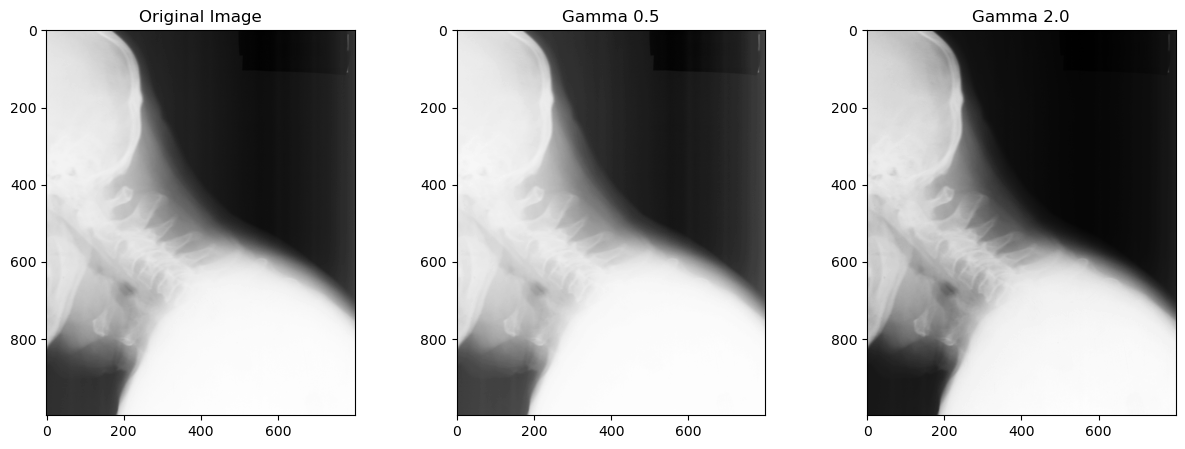

In [9]:
gamma_corrected_05 = gamma_map(image, 0.5)
gamma_corrected_20 = gamma_map(image, 2.0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gamma 0.5')
plt.imshow(gamma_corrected_05, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gamma 2.0')
plt.imshow(gamma_corrected_20, cmap='gray')

plt.show()


In [10]:
def threshold_image(img_in, thres):
    img_out = img_as_ubyte(img_in > thres) * 255
    return img_out


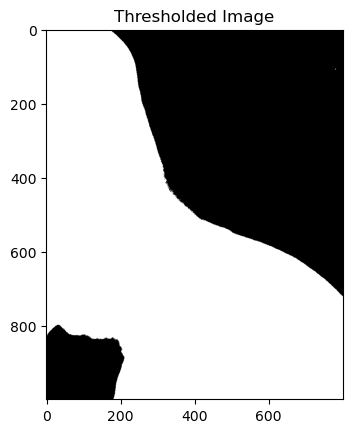

In [11]:
thresholded_image = threshold_image(image, 128)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()


Otsu threshold: 148


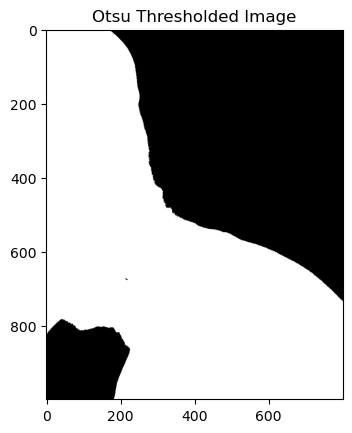

In [12]:
from skimage.filters import threshold_otsu

otsu_threshold = threshold_otsu(image)
print(f'Otsu threshold: {otsu_threshold}')

otsu_image = threshold_image(image, otsu_threshold)

plt.imshow(otsu_image, cmap='gray')
plt.title('Otsu Thresholded Image')
plt.show()


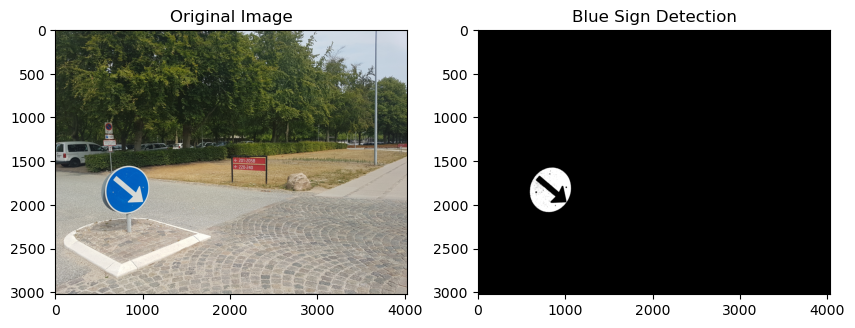

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_dtu_signs(img, color='blue'):
    # Split the image into its RGB components
    r_comp, g_comp, b_comp = img[:, :, 2], img[:, :, 1], img[:, :, 0]  # OpenCV reads in BGR order
    
    if color == 'blue':
        # Threshold for blue signs
        mask = (r_comp < 50) & (g_comp > 85) & (b_comp > 180)
    elif color == 'red':
        # Threshold for red signs
        mask = (r_comp > 150) & (g_comp < 80) & (b_comp < 80)
        
    # Create a binary output image
    result = np.zeros_like(r_comp)
    result[mask] = 255  # Mark detected regions as white
    
    return result

# Read the image
image1 = cv2.imread(r"C:\Users\stani\Desktop\chuj\exercises\ex3-PixelwiseOperations\data\DTUSigns2.jpg")

# Detect blue signs
blue_signs = detect_dtu_signs(image1, color='blue')

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display

plt.subplot(1, 2, 2)
plt.title('Blue Sign Detection')
plt.imshow(blue_signs, cmap='gray')  # Show the binary mask of detected blue signs

plt.show()



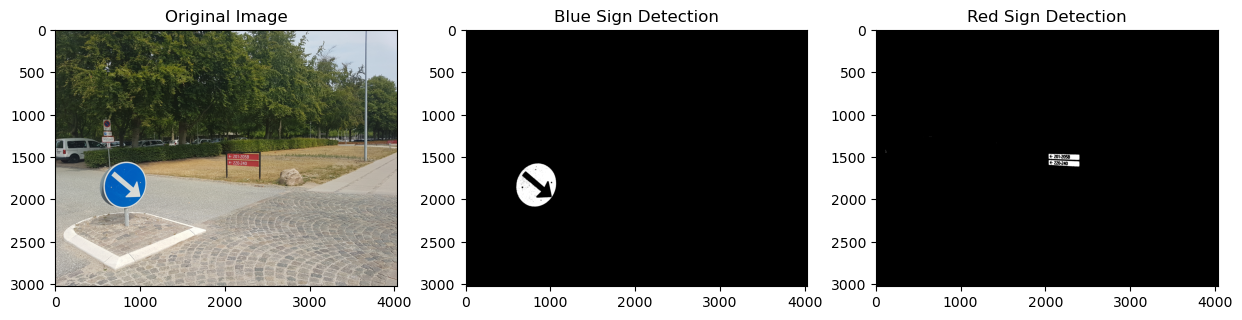

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_dtu_signs(img, color='blue'):
    # Split the image into its RGB components
    r_comp, g_comp, b_comp = img[:, :, 2], img[:, :, 1], img[:, :, 0]  # OpenCV reads in BGR order

    if color == 'blue':
        # Threshold for blue signs (example values)
        mask = (r_comp < 50) & (g_comp > 85) & (b_comp > 180)
    elif color == 'red':
        # Threshold for red signs (example values)
        mask = (r_comp > 150) & (g_comp < 80) & (b_comp < 80)
    else:
        raise ValueError("Color must be either 'blue' or 'red'")

    # Create a binary output image
    result = np.zeros_like(r_comp)
    result[mask] = 255  # Mark detected regions as white
    
    return result

# Read the image
image1 = cv2.imread(r"C:\Users\stani\Desktop\chuj\exercises\ex3-PixelwiseOperations\data\DTUSigns2.jpg")

# Detect blue signs
blue_signs = detect_dtu_signs(image1, color='blue')

# Detect red signs
red_signs = detect_dtu_signs(image1, color='red')

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display

# Blue sign detection
plt.subplot(1, 3, 2)
plt.title('Blue Sign Detection')
plt.imshow(blue_signs, cmap='gray')  # Show the binary mask of detected blue signs

# Red sign detection
plt.subplot(1, 3, 3)
plt.title('Red Sign Detection')
plt.imshow(red_signs, cmap='gray')  # Show the binary mask of detected red signs

plt.show()


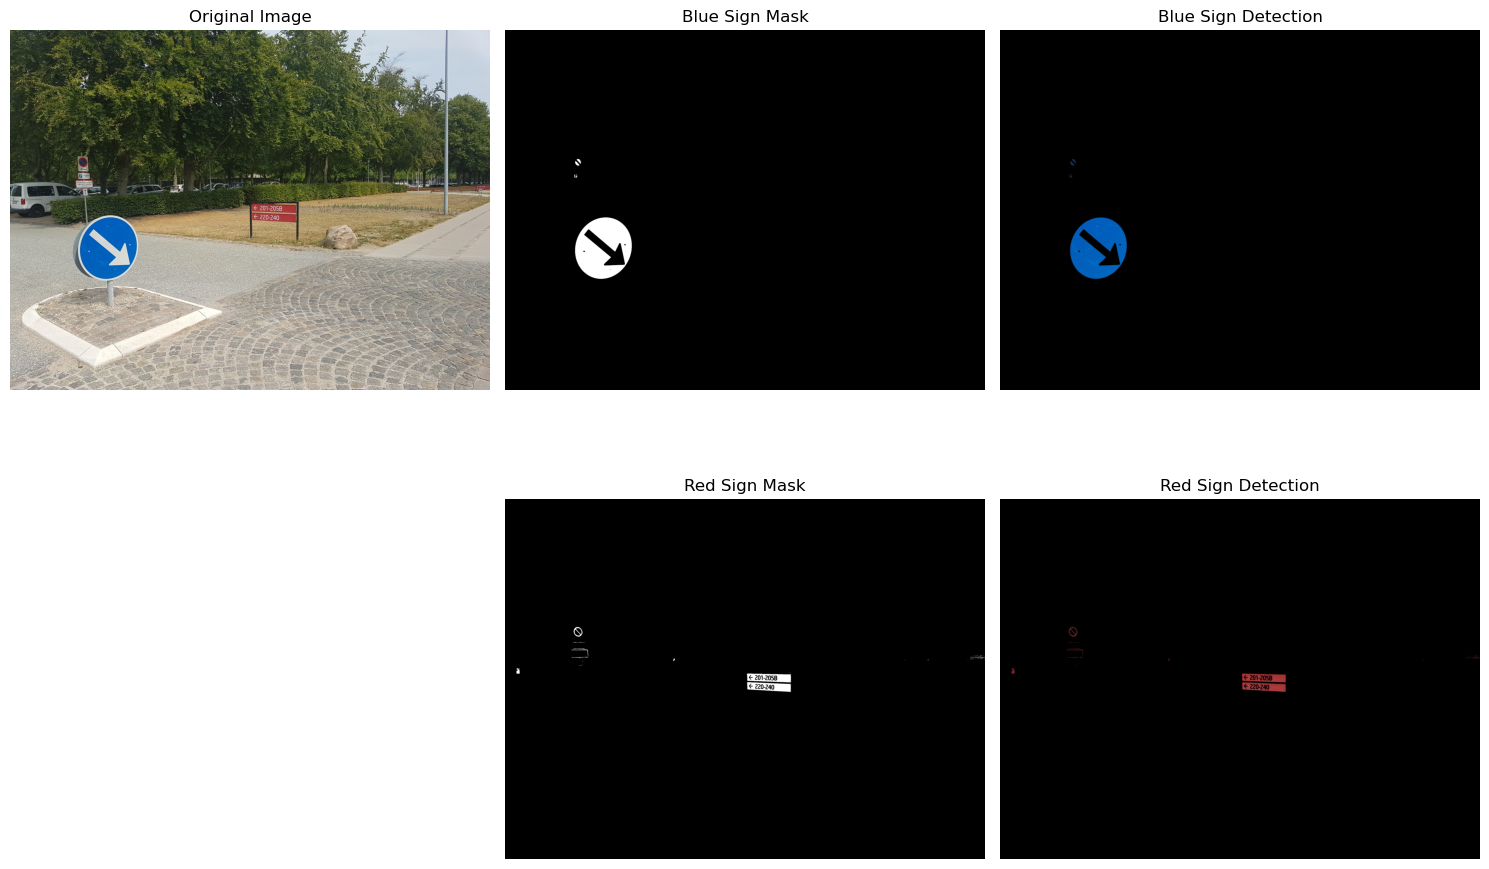

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

def detect_dtu_signs_hsv(img, color='blue'):
    # Convert the image from BGR (OpenCV default) to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define HSV ranges for blue and red colors
    if color == 'blue':
        # Blue sign HSV threshold ranges
        lower_blue = np.array([100, 150, 50])  # H:100-130, S: higher to capture vivid color, V: brightness
        upper_blue = np.array([130, 255, 255])
        mask = cv2.inRange(hsv_img, lower_blue, upper_blue)
    
    elif color == 'red':
        # Red sign has two hue ranges: 0-10 and 170-180 degrees
        lower_red1 = np.array([0, 150, 50])
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([170, 150, 50])
        upper_red2 = np.array([180, 255, 255])
        
        # Combine the two red ranges using bitwise OR
        mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
        mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)
        mask = mask1 | mask2
    
    else:
        raise ValueError("Color must be either 'blue' or 'red'")
    
    # Apply the mask on the original image to extract the colored regions
    result = cv2.bitwise_and(img, img, mask=mask)
    
    return mask, result

# Read the image
image1 = cv2.imread(r"C:\Users\stani\Desktop\chuj\exercises\ex3-PixelwiseOperations\data\DTUSigns2.jpg")

# Detect blue signs in HSV space
blue_mask, blue_result = detect_dtu_signs_hsv(image1, color='blue')

# Detect red signs in HSV space
red_mask, red_result = detect_dtu_signs_hsv(image1, color='red')

# Show the results using matplotlib
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

# Blue mask
plt.subplot(2, 3, 2)
plt.title('Blue Sign Mask')
plt.imshow(blue_mask, cmap='gray')
plt.axis('off')

# Blue detection result
plt.subplot(2, 3, 3)
plt.title('Blue Sign Detection')
plt.imshow(cv2.cvtColor(blue_result, cv2.COLOR_BGR2RGB))  # Convert for display
plt.axis('off')

# Red mask
plt.subplot(2, 3, 5)
plt.title('Red Sign Mask')
plt.imshow(red_mask, cmap='gray')
plt.axis('off')

# Red detection result
plt.subplot(2, 3, 6)
plt.title('Red Sign Detection')
plt.imshow(cv2.cvtColor(red_result, cv2.COLOR_BGR2RGB))  # Convert for display
plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
import cv2
import time

def video_capture_processing():
    # Start video capture
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return

    # Set up frame rate calculation
    prev_frame_time = 0
    new_frame_time = 0

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Basic processing: Invert the grayscale image
        inverted_frame = 255 - gray_frame

        # Calculate the frames per second (FPS)
        new_frame_time = time.time()
        fps = int(1 / (new_frame_time - prev_frame_time))q
        prev_frame_time = new_frame_time

        # Display FPS on the frame
        cv2.putText(frame, f"FPS: {fps}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame and processed frame
        cv2.imshow("Original", frame)
        cv2.imshow("Inverted Gray", inverted_frame)

        # Check if 'q' is pressed to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()

# Run the function
video_capture_processing()


In [22]:
def video_capture_thresholding():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return

    prev_frame_time = 0
    new_frame_time = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply a threshold (e.g., threshold at 128)
        _, thresh_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY)

        # Calculate the FPS
        new_frame_time = time.time()
        fps = int(1 / (new_frame_time - prev_frame_time))
        prev_frame_time = new_frame_time

        # Display FPS on the original frame
        cv2.putText(frame, f"FPS: {fps}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame and the thresholded frame
        cv2.imshow("Original", frame)
        cv2.imshow("Thresholded Gray", thresh_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the function
video_capture_thresholding()


In [ ]:
def gamma_correction(image, gamma=1.0):
    # Apply gamma correction
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def video_capture_gamma_mapping():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return

    prev_frame_time = 0
    new_frame_time = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply gamma correction (e.g., gamma=0.5 for darkening)
        gamma_frame = gamma_correction(gray_frame, gamma=0.5)

        # Calculate the FPS
        new_frame_time = time.time()
        fps = int(1 / (new_frame_time - prev_frame_time))
        prev_frame_time = new_frame_time

        # Display FPS on the original frame
        cv2.putText(frame, f"FPS: {fps}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame and the gamma-corrected frame
        cv2.imshow("Original", frame)
        cv2.imshow("Gamma Corrected", gamma_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the function
video_capture_gamma_mapping()


In [23]:
def gamma_correction(image, gamma=1.0):
    # Apply gamma correction
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def video_capture_gamma_mapping():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return

    prev_frame_time = 0
    new_frame_time = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply gamma correction (e.g., gamma=0.5 for darkening)
        gamma_frame = gamma_correction(gray_frame, gamma=0.5)

        # Calculate the FPS
        new_frame_time = time.time()
        fps = int(1 / (new_frame_time - prev_frame_time))
        prev_frame_time = new_frame_time

        # Display FPS on the original frame
        cv2.putText(frame, f"FPS: {fps}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame and the gamma-corrected frame
        cv2.imshow("Original", frame)
        cv2.imshow("Gamma Corrected", gamma_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the function
video_capture_gamma_mapping()


In [24]:
def detect_dtu_signs_in_video():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return

    prev_frame_time = 0
    new_frame_time = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert to HSV
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define HSV range for blue and red signs
        lower_blue = np.array([100, 150, 50])
        upper_blue = np.array([130, 255, 255])

        lower_red1 = np.array([0, 150, 50])
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([170, 150, 50])
        upper_red2 = np.array([180, 255, 255])

        # Blue mask
        blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

        # Red mask (combine two ranges)
        red_mask1 = cv2.inRange(hsv_frame, lower_red1, upper_red1)
        red_mask2 = cv2.inRange(hsv_frame, lower_red2, upper_red2)
        red_mask = red_mask1 | red_mask2

        # Apply mask on original frame
        blue_result = cv2.bitwise_and(frame, frame, mask=blue_mask)
        red_result = cv2.bitwise_and(frame, frame, mask=red_mask)

        # Calculate the FPS
        new_frame_time = time.time()
        fps = int(1 / (new_frame_time - prev_frame_time))
        prev_frame_time = new_frame_time

        # Display FPS on the original frame
        cv2.putText(frame, f"FPS: {fps}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original, blue detection, and red detection frames
        cv2.imshow("Original", frame)
        cv2.imshow("Blue Sign Detection", blue_result)
        cv2.imshow("Red Sign Detection", red_result)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the function
detect_dtu_signs_in_video()
